# Wrangling and Analyzing Data - WeRateDogs Tweets

## Data Gathering
**All** three pieces of data for this project and will be gathered and loaded into the notebook. Different methods are required to gather each data.
1. Direct download of the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [68]:
# import the required packages
import tweepy
import requests
import pandas as pd
import json
import time
import math
import matplotlib.pyplot as plt

In [69]:
# load the downloaded file to a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.shape

(2356, 17)

2. Downloading the tweet image prediction (image_predictions.tsv) data from the url provided

In [70]:
# use requests library to download the tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [71]:
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [72]:
#load the predictions data imto a pandas dataframe and view contents of top 3 rows
df_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [73]:
# create an empty list and read json file to create a dataframe
df_jsontweet = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_jsontweet.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
df_status = pd.DataFrame(df_jsontweet, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [74]:
# get dimensions of the dataframe
df_status.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### In this section, the gathered data is assessed for any abnormalities, quality and tidiness.At least eight (8) quality issues and two (2) tidiness issue were identified both by visual assessment programmatic assessement.

### Properties of the Datasets

The assessment will involve the following 3 datasets
* df_archive
* df_predictions
* df_status

#### I. Assessing the twitter-archive-enhanced dataset (df_archive)

In [75]:
df_archive.shape

(2356, 17)

In [76]:
df_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,None,None,None,None


In [77]:
#collect dataset information
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [78]:
# Confirm data type for timestamp
type(df_archive['timestamp'][9])

str

In [79]:
# obtain summary statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [80]:
# check for unique values in the dataframe
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [81]:
# find out duplicate entries
df_archive.duplicated().sum()

0

In [82]:
#confirm range of values for the deominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [83]:
# confirm denominator values for invalid entries i.e 0 or negative numbers
df_archive.query("rating_denominator <= 0 ").tweet_id.value_counts()

835246439529840640    1
Name: tweet_id, dtype: int64

In [84]:
# confirm numerator values for invalid entries i.e 0 or negative numbers
df_archive.query("rating_numerator <=0 ").tweet_id.value_counts()

746906459439529985    1
835152434251116546    1
Name: tweet_id, dtype: int64

#### II. Assessing the twitter predictions dataset (df_predictions)

In [85]:
# check rows and columns
df_predictions.shape

(2075, 12)

In [86]:
# sample 3 random rows
df_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False


In [87]:
#collect dataset information
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [88]:
# obtain summary statistics
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [89]:
# check for unique values in the dataframe
df_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [90]:
# find out duplicate entries
df_predictions.duplicated().sum()

0

In [91]:
# Check for tweet ids that have sucessful predictions
len(df_archive[~df_archive.tweet_id.isin(df_predictions.tweet_id)])

281

#### III. Assessing the twitter status dataset (df_status)

In [92]:
# check rows and columns
df_status.shape

(2354, 3)

In [93]:
# sample 3 random rows
df_status.sample(3)

,tweet_id,retweet_count,favorite_count
1074,739606147276148736,1876,5897
2063,671151324042559489,166,714
1516,690932576555528194,1143,3602


In [94]:
#collect dataset information
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [95]:
# obtain summary statistics
df_status.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [96]:
# check for unique values in the dataframe
df_status.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [97]:
# find out duplicate entries exist
df_status.duplicated().sum()

0

### Quality issues

1.Data incompleteness due to missing values in the dog stages

2.Existence of retweets and replies in the dataset

3.HTML tags in the df_archive Dataframe that make analysis cumbersome

4.Inconsistent value of not equal to 10 in the denominator

5.Incorrect data type of str for timestamp and retweeted_status_timestamp

5.Abnormal values in the rating_numerator column i.e 1776

6.A number of tweet_id(s) of df_archive dataframe are missing in df_predictions table

7.Nondescriptive column headers for columns p1, p2, p3 in the df_predictions dataframe

8.Existence of missing values in the jpg_url column to match tweet_id(s) that have been successfully predicted

### Tidiness issues
1.Create a column that contains dog stages by combining columns doggo, floofer, pupper and puppo

2.Combine the datasets into a master dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [98]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_status_clean = df_status.copy()

### Issue #1: Missing values in the df_archive Dataframe

#### Define:

**Issue:** Missing values

**Solution:** Replace None entries with NaN in the name and dog stages columns of the df_archive_clean dataframe.

#### Code

In [99]:
# replace None with NaN
df_archive_clean = df_archive_clean.replace('None', 'NaN')

#### Test

In [100]:
#confirm if None values have been replaced by NaN
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


### Issue #2:Existence of retweets and replies related columns in the df_archive Dataframe 

#### Define
**Issue:** Existence of retweets and replies

**Solution:** Remove retweets nd replies from the dataframe

#### Code

In [101]:
#slice out rows that have retweet_status_id as null
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

In [102]:
#drop columns related to retweets
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [103]:
#confirm that the original dataset has retweets and replies
assert df_archive.retweeted_status_timestamp.notnull().sum() != 0

In [104]:
#confirm if retweet columns were dropped
assert 'retweeted_status_timestamp' not in df_archive_clean

In [105]:
#display dataset information
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: HTML tags in the df_archive Dataframe

#### Define:
**Issue:** Presence of html tags in source column

**Solution:** Strip html tags and leave the mode used for tweeting, e.g Twitter for iPhone

#### Code

In [106]:
#replace 'a' tags with an empty character
df_archive_clean.source = df_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [107]:
#confirm the data from the original dataset
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [108]:
#verify that the tags have been removed
df_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4:Inconsistent values in the denominator df_archive Dataframe

#### Define:
**Issue:** Inconsistent denominator values, assuming a scale of 10

**Solution:** Drop values not equal to 10

#### Code

In [109]:
#slice out values that equal to 10 in the rating_denominator column
df_archive_clean = df_archive_clean[df_archive_clean.rating_denominator == 10]

#### Test

In [110]:
#confirm rating_denominator values counts
df_archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Issue #5:Incorrect data type of str for timestamp in the df_archive dataframe

#### Define:
**Issue:** Incorrect data type for timestamp columns

**Solution:** convert to datetime the timestamp column

#### Code

In [111]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [112]:
type(df_archive_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [113]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 298.7+ KB


### Issue #6:Rating_numerator column has abnormally large values

#### Define:
**Issue:** Abnormally large values in the rating_numerator columns

**Solution:** Drop the abnormal values from the dataset

#### Code

In [114]:
#slice out values that are greater than 20 in the rating_numerator column
df_archive_clean = df_archive_clean[df_archive_clean.rating_numerator  < 20]

#### Test

In [115]:
df_archive_clean['rating_numerator'].value_counts().sort_index()

0       2
1       7
2       9
3      19
4      15
5      36
6      32
7      53
8      98
9     155
10    442
11    425
12    500
13    307
14     43
15      1
17      1
Name: rating_numerator, dtype: int64

### Issue #7:Nondescriptive column headers for columns p1, p2, p3 in the df_predictions dataframe

#### Define:
**Issue:** Nondescriptive column headers

**Solution:** Rename the columns

#### Code

In [116]:
#rename columns p1,p2,p3 to be descriptive
df_predictions_clean.rename({'p1':'prediction1',
                            'p2': 'prediction2',
                            'p3':'prediction3',
                            'p1_conf':'prediction1_confirmation',
                            'p2_conf': 'prediction2_confirmation',
                            'p3_conf':'prediction3_confirmation',
                            'p1_dog':'prediction1_isdog',
                            'p2_dog':'prediction2_isdog',
                            'p3_dog':'prediction3_isdog'},axis = 1, inplace=True)

#### Test

In [117]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                    2075 non-null int64
jpg_url                     2075 non-null object
img_num                     2075 non-null int64
prediction1                 2075 non-null object
prediction1_confirmation    2075 non-null float64
prediction1_isdog           2075 non-null bool
prediction2                 2075 non-null object
prediction2_confirmation    2075 non-null float64
prediction2_isdog           2075 non-null bool
prediction3                 2075 non-null object
prediction3_confirmation    2075 non-null float64
prediction3_isdog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #8: Inaccurate predictions in the df_predictions dataset

#### Define:
**Issue:** Inaccurate dog predictions

**Solution:** Drop inacurrate predictions

#### Code

In [118]:
# remove predictions that failed to identify dogs from any of the three predictions
df_predictions_clean = df_predictions_clean.query("prediction1_isdog == True and prediction2_isdog == True and prediction3_isdog == True")

#### Test

In [119]:
#confirm accurate predictions of dogs
print(df_predictions_clean['prediction1_isdog'].value_counts())
print(df_predictions_clean['prediction2_isdog'].value_counts())
print(df_predictions_clean['prediction3_isdog'].value_counts())

True    1243
Name: prediction1_isdog, dtype: int64
True    1243
Name: prediction2_isdog, dtype: int64
True    1243
Name: prediction3_isdog, dtype: int64


### Data Tidiness Issue #1: .Combining dog stages columns into one 

#### Define:
**Issue:** Different columns contain doggo, floofer, pupper and puppo

**Solution:** Combine the columns into one since they refer to one observation

#### Code

In [120]:
# combine the doggo, floofer, pupper and puppo columns to a new dog_stage column
df_archive_clean['dog_stage'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [121]:
# drop the doggo, floofer, pupper and puppo columns that have been merged
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [122]:
#confirm unique entries in the dog_stage column
df_archive_clean['dog_stage'].unique()

array(['NaN', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [123]:
#confirm value counts in the dog_stage column
df_archive_clean.dog_stage.value_counts()

NaN        1802
pupper      233
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

### Data Quality Issue #2: Combining the 3 datasets

#### Define:
**Issue:** Related datasets stored in different dataframes

**Solution:** Merge df_archive, df_predictions and df_status to form a master dataset

#### Code

In [124]:
#merge df_archive, df_predictions clean datasets
df_master = df_archive_clean.merge(df_predictions_clean ,how='inner', on='tweet_id')

In [125]:
#merge df_archive, df_predictions and df_status clean datasets
df_master = df_master.merge(df_status_clean ,how='inner', on='tweet_id')

#### Test

In [126]:
#confirm the information of the resulting dataset
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1186
Data columns (total 22 columns):
tweet_id                    1187 non-null int64
timestamp                   1187 non-null datetime64[ns]
source                      1187 non-null object
text                        1187 non-null object
expanded_urls               1187 non-null object
rating_numerator            1187 non-null int64
rating_denominator          1187 non-null int64
name                        1187 non-null object
dog_stage                   1187 non-null object
jpg_url                     1187 non-null object
img_num                     1187 non-null int64
prediction1                 1187 non-null object
prediction1_confirmation    1187 non-null float64
prediction1_isdog           1187 non-null bool
prediction2                 1187 non-null object
prediction2_confirmation    1187 non-null float64
prediction2_isdog           1187 non-null bool
prediction3                 1187 non-null object
predictio

In [127]:
df_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction1_confirmation,prediction1_isdog,prediction2,prediction2_confirmation,prediction2_isdog,prediction3,prediction3_confirmation,prediction3_isdog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [128]:
#store merged dataset to csv
df_master.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [129]:
#summary statisstics for favourite_count
df_master['favorite_count'].describe()

count      1187.000000
mean       9348.310025
std       12613.132148
min          81.000000
25%        2239.500000
50%        4578.000000
75%       11750.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [130]:
#total count per dog stage
df_master.dog_stage.value_counts()

NaN        998
pupper     124
doggo       39
puppo       19
floofer      7
Name: dog_stage, dtype: int64

In [131]:
#dogs that were rated above 10
df_master['rating_numerator'][df_master['rating_numerator'] > 10].value_counts().sum()

751

In [132]:
#most liked dog
df_master.loc[df_master['favorite_count'].idxmax()]

tweet_id                                                   822872901745569793
timestamp                                                 2017-01-21 18:26:02
source                                                     Twitter for iPhone
text                        Here's a super supportive puppo participating ...
expanded_urls               https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                           13
rating_denominator                                                         10
name                                                                      NaN
dog_stage                                                               puppo
jpg_url                       https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
img_num                                                                     1
prediction1                                                  Lakeland_terrier
prediction1_confirmation                                        

### Insights:
1.In the istribution of favorites (likes), the mdian count is closer to the lower quartile

2.The most popular dog stage rated was pupper

3.The most liked dog stage is puppo

4.Out of a total of 1187 dogs rated by WeRateDogs, a total of 751 dogs were rated above 10, constituting a 63%.

### Visualization

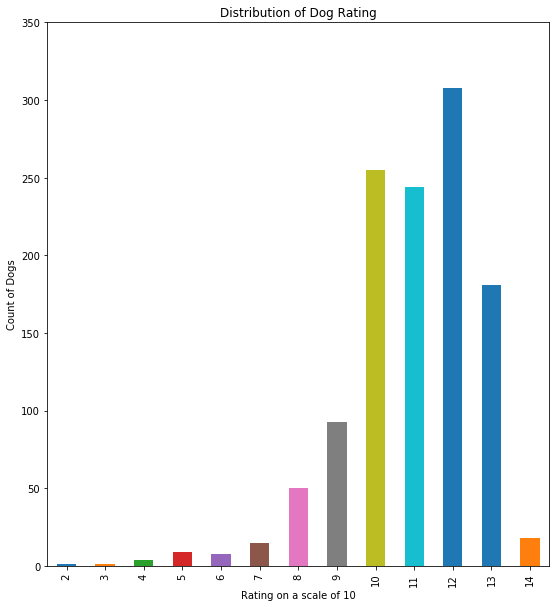

In [133]:
ax = df_master.rating_numerator.value_counts().sort_index().plot('bar',figsize=(9,10), title = 'Distribution of Dog Rating')
ax.set_xlabel("Rating on a scale of 10")
ax.set_ylabel("Count of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350])
plt.savefig('rating_dist')

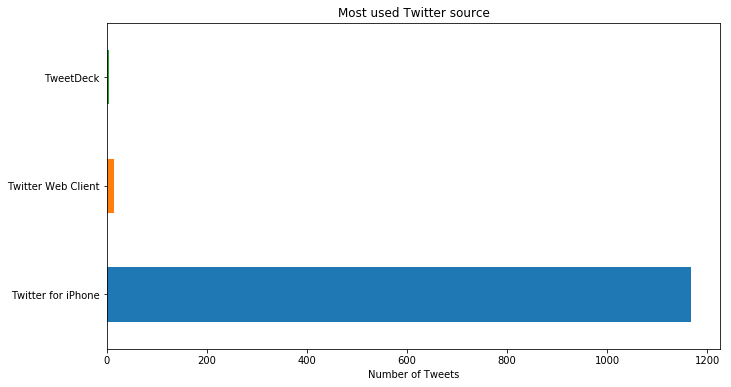

In [134]:
df_master['source'].value_counts().plot('barh', figsize=(11,6), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

### Observations
*1. Most dogs received a rating of 12*

*2. iPhones were mostly used to tweet*